In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [51]:
#reading the dataasaet 
df=pd.read_csv("expected_ctc.csv")
df.head()




In [23]:
#dropping the columns which have to diverse variables or less significance in final outcome 
df.drop(columns=["IDX","Applicant_ID","Organization","Designation"],inplace=True)

In [24]:
df.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_Publications                   0
Certifications                           0
Internation

In [25]:
df.shape

(25000, 25)

In [29]:
# After reviewing the data dropping columns with too detailed ,optional data, or almost 50% missing data.

df.drop(columns=["Graduation_Specialization", "University_Grad", "Passing_Year_Of_Graduation",
    "PG_Specialization", "University_PG", "Passing_Year_Of_PG",
    "PHD_Specialization", "University_PHD", "Passing_Year_Of_PHD"], inplace=True,errors='ignore')



In [30]:
#analysing the cleaned data to decide how to fill the missing values 
df.head()


,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,PG,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [34]:
# Filling with most common value (mode)
for col in ["Department", "Role", "Industry", "Last_Appraisal_Rating"]:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [35]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,Marketing,Others,Training,PG,Guwahati,Pune,0,N,B,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [38]:
#encoding the categorial columns and feature engineering
selected_columns = [
    "Total_Experience", "Total_Experience_in_field_applied", "Current_CTC",
    "Certifications", "No_Of_Companies_worked", "Number_of_Publications",
    "Department", "Role", "Industry", "Education", "Inhand_Offer",
    "Last_Appraisal_Rating", "Curent_Location", "Preferred_location", 
    "International_degree_any", "Expected_CTC" ]

df = df[selected_columns]





In [39]:
#ONE_HOT ENCODING
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Total_Experience,Total_Experience_in_field_applied,Current_CTC,Certifications,No_Of_Companies_worked,Number_of_Publications,International_degree_any,Expected_CTC,Department_Analytics/BI,Department_Banking,...,Preferred_location_Guwahati,Preferred_location_Jaipur,Preferred_location_Kanpur,Preferred_location_Kolkata,Preferred_location_Lucknow,Preferred_location_Mangalore,Preferred_location_Mumbai,Preferred_location_Nagpur,Preferred_location_Pune,Preferred_location_Surat
0,0,0,0,0,0,0,0,384551,False,False,...,False,False,False,False,False,False,False,False,True,False
1,23,14,2702664,0,2,4,0,3783729,False,False,...,False,False,False,False,False,False,False,True,False,False
2,21,12,2236661,0,5,3,0,3131325,False,False,...,False,True,False,False,False,False,False,False,False,False
3,15,8,2100510,0,5,3,0,2608833,False,True,...,False,False,False,True,False,False,False,False,False,False
4,10,5,1931644,0,2,3,0,2221390,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# Train-Test Split + Scaling
x=df_encoded.drop(columns=["Expected_CTC"])
y=df_encoded["Expected_CTC"]



In [42]:
#importing required train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)



In [44]:
# training the model
from sklearn.linear_model import LinearRegression 

lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
       

LinearRegression()

In [46]:
#making the predictions
y_pred=lr.predict(x_test_scaled)


In [47]:
#evaluate the model 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)
print("R2 Score:",r2)

mae: 67190.4203404768
mse: 10278005238.686008
R2 Score: 0.992400602253176


In [52]:
#analysing the metrics  with original dataset
df["Expected_CTC"].describe()

count    2.500000e+04
mean     2.250155e+06
std      1.160480e+06
min      2.037440e+05
25%      1.306278e+06
50%      2.252136e+06
75%      3.051354e+06
max      5.599570e+06
Name: Expected_CTC, dtype: float64

In [53]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 5.27%


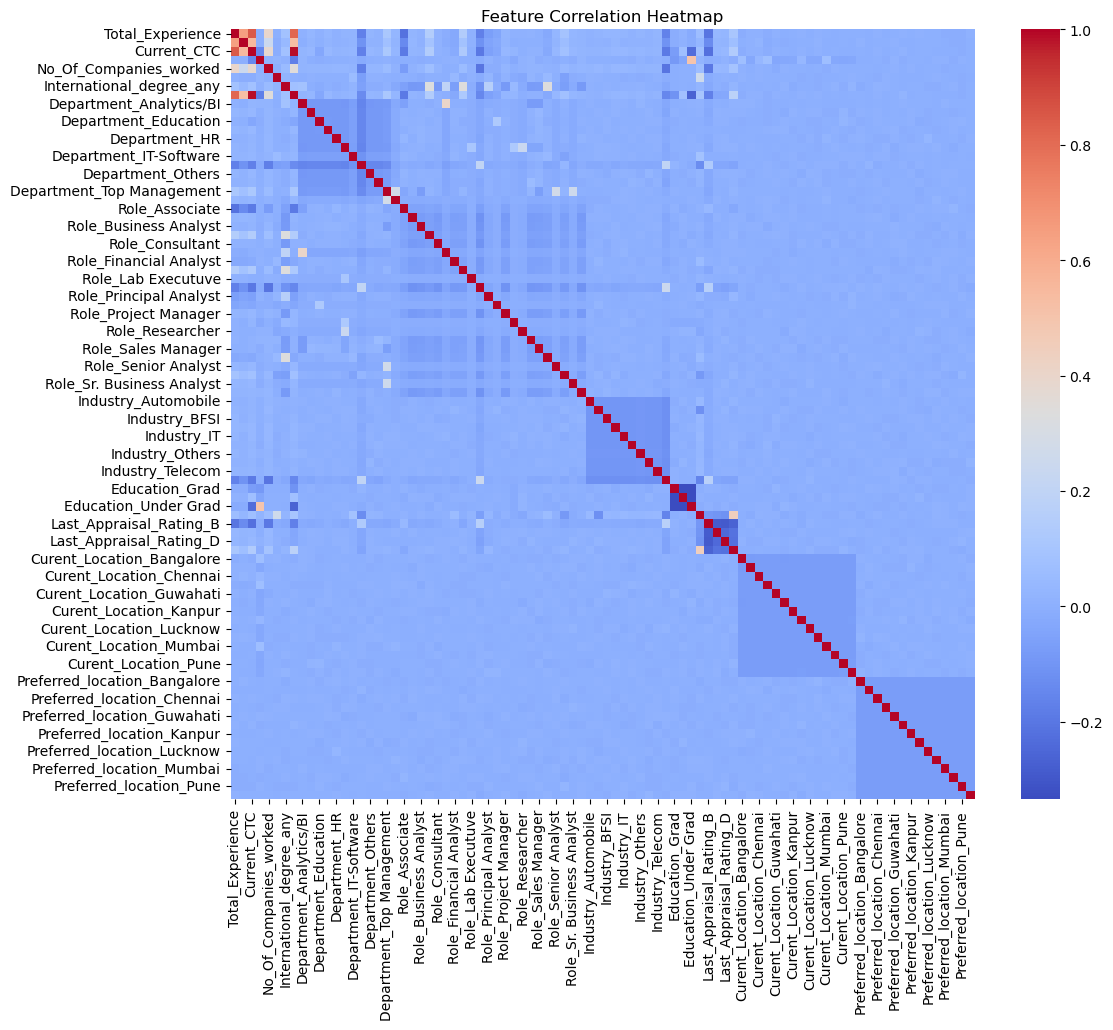

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#correlation heatmap shows that Total_Experience, Current_CTC, and a few other features have strong relationships with the target variable Expected_CTC. There's no serious multicollinearity between features

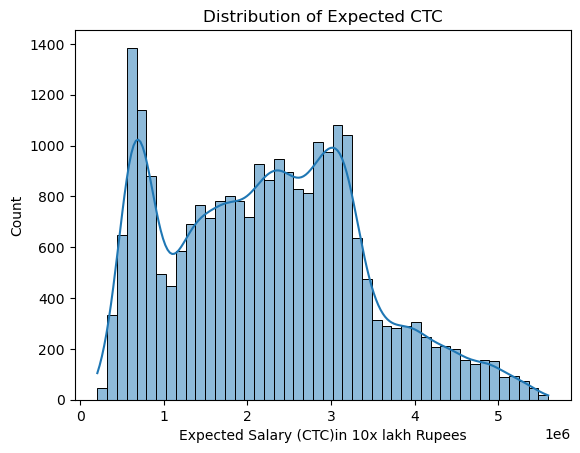

In [57]:
sns.histplot(df['Expected_CTC'], kde=True)
plt.title("Distribution of Expected CTC")
plt.xlabel("Expected Salary (CTC)in 10x lakh Rupees")
plt.show()


In [ ]:
#distribution of Expected_CTC is right-skewed, with most candidates expecting between ₹7 to ₹30 lakhs. The tallest bar (~1400) means ~1400 people fall in that CTC bin. There are fewer candidates at very high salary expectations (₹40L+), which may affect model performance on outliers.

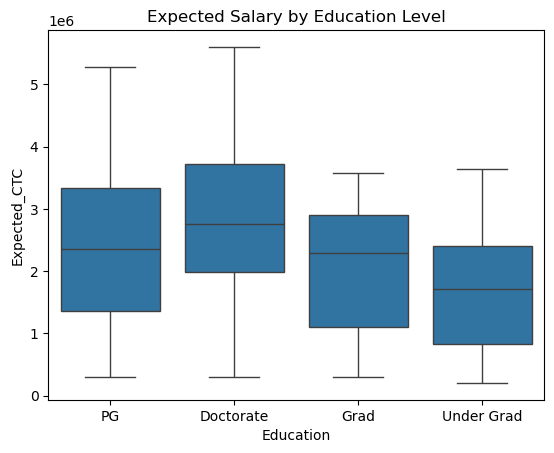

In [58]:
sns.boxplot(x='Education', y='Expected_CTC', data=df)
plt.title("Expected Salary by Education Level")
plt.show()


In [ ]:
#candidates with Postgraduate and Doctorate degrees tend to expect higher salaries. PG holders have the highest median CTC, while Doctorate holders show the widest range in salary expectations. In contrast, Graduates and Undergraduates expect relatively lower and more consistent salaries. This confirms that higher education levels are generally associated with higher salary expectations.

In [ ]:
#CONCLUSION
#My linear regression model predicts candidate salaries with a 95% accuracy on average,
# explains 99.24% of the variation in salary based on features like experience, role, and industry

In [59]:
#saving the model 
import joblib

# Save model and scaler
joblib.dump(lr, "linear_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']